# Motion data exploration

In [53]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import defaultdict
from pprint import pprint

np.random.seed(0)
color_names = list(mcolors.CSS4_COLORS.keys())
color_names = [color_names[i] for i in np.random.choice(np.arange(len(color_names)), size=(len(color_names),), replace=False)]

In [3]:
with open("../data/parsed_data.p", "rb") as f:
    data = pickle.load(f)

In [ ]:
def extract_unique_elements(input_list):
    # Initialize a defaultdict with integer values
    element_count = defaultdict(int)
    
    # Count the occurrences of each element
    for element in input_list:
        element_count[element] += 1
    
    # Extract elements that occur only once
    unique_elements = [element for element, count in element_count.items()]
    
    return unique_elements

In [22]:
print(data.keys())
print(data["sdc_track_index"])
print(data["tracks_to_predict"])
print("objects", len(data["objects"]), data["objects"][0].keys())
print("roads", len(data["roads"]), data["roads"][0].keys())
print(data["tl_states"].keys())

dict_keys(['scenario_id', 'sdc_track_index', 'tracks_to_predict', 'objects', 'roads', 'tl_states'])
54
[14, 5, 40, 43, 6]
objects 55 dict_keys(['position', 'width', 'length', 'heading', 'velocity', 'valid', 'type', 'id'])
roads 785 dict_keys(['id', 'type', 'points', 'is_polygon', 'old_type'])
dict_keys([479, 481, 482, 483, 484, 485, 486, 487, 498, 499, 500, 501, 502, 503, 508, 705, 706, 707, 846, 504, 505, 506, 507, 842, 843, 844, 845])


In [138]:
print("one object")
pprint({k: type(v) for k, v in data["objects"][0].items()})
pprint({k: f"len={len(v)}" if isinstance(v, list) else v for k, v in data["objects"][0].items()})

print("\nall objects")
print("traj len", [len(o["heading"]) for o in data["objects"]])

unique_obj_types = extract_unique_elements([o["type"] for o in data["objects"]])
print("\nunique object types")
pprint(unique_obj_types)

one object
{'heading': <class 'list'>,
 'id': <class 'int'>,
 'length': <class 'float'>,
 'position': <class 'list'>,
 'type': <class 'str'>,
 'valid': <class 'list'>,
 'velocity': <class 'list'>,
 'width': <class 'float'>}
{'heading': 'len=91',
 'id': 1792,
 'length': 5.376431465148926,
 'position': 'len=91',
 'type': 'vehicle',
 'valid': 'len=91',
 'velocity': 'len=91',
 'width': 2.1952974796295166}

all objects
traj len [91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91]

unique object types
['vehicle', 'pedestrian']


In [137]:
print("one road")
pprint({k: type(v) for k, v in data["roads"][0].items()})
pprint({k: f"len={len(v)}" if isinstance(v, list) else v for k, v in data["roads"][0].items()})

print("\nall roads")
print("num road points", [len(o["points"]) for o in data["roads"]])

unique_road_types = extract_unique_elements([r["type"] for r in data["roads"]])
road_type_cmap = {t: color_names[i] for i, t in enumerate(unique_road_types)}
road_type_cmap[unique_road_types[10]] = "red"
print("\nunique road types")
pprint(unique_road_types)

one road
{'id': <class 'int'>,
 'is_polygon': <class 'bool'>,
 'old_type': <class 'str'>,
 'points': <class 'list'>,
 'type': <enum 'FeatureType'>}
{'id': 1,
 'is_polygon': False,
 'old_type': 'road_line',
 'points': 'len=632',
 'type': <FeatureType.BROKEN_SINGLE_WHITE_BOUNDARY: 6>}

all roads
num road points [632, 259, 136, 134, 57, 68, 272, 50, 291, 289, 92, 80, 76, 78, 41, 40, 430, 142, 207, 131, 131, 38, 109, 108, 172, 115, 51, 349, 73, 72, 91, 12, 35, 112, 276, 80, 81, 50, 80, 16, 365, 172, 43, 43, 171, 83, 61, 69, 293, 72, 14, 28, 85, 71, 126, 417, 104, 104, 39, 55, 39, 155, 30, 88, 33, 88, 127, 49, 136, 49, 79, 126, 214, 83, 39, 54, 172, 173, 54, 88, 131, 89, 89, 89, 344, 80, 81, 37, 247, 9, 35, 5, 131, 50, 46, 4, 39, 96, 78, 559, 5, 6, 5, 53, 54, 75, 17, 17, 38, 558, 57, 64, 460, 76, 62, 62, 38, 128, 128, 109, 108, 19, 97, 97, 131, 26, 171, 237, 26, 103, 192, 25, 58, 55, 7, 43, 43, 81, 499, 55, 89, 80, 80, 51, 52, 134, 135, 124, 123, 124, 44, 200, 188, 61, 70, 51, 83, 163, 61, 

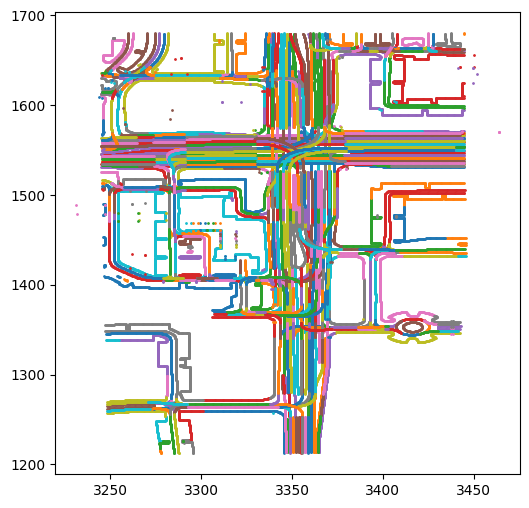

In [42]:
def plot_road_points(roads, ax):
    for road in roads:
        points = np.array([(p["x"], p["y"]) for p in road["points"]])
        ax.scatter(points[:, 0], points[:, 1], s=1)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_road_points(data["roads"], ax)
plt.show()

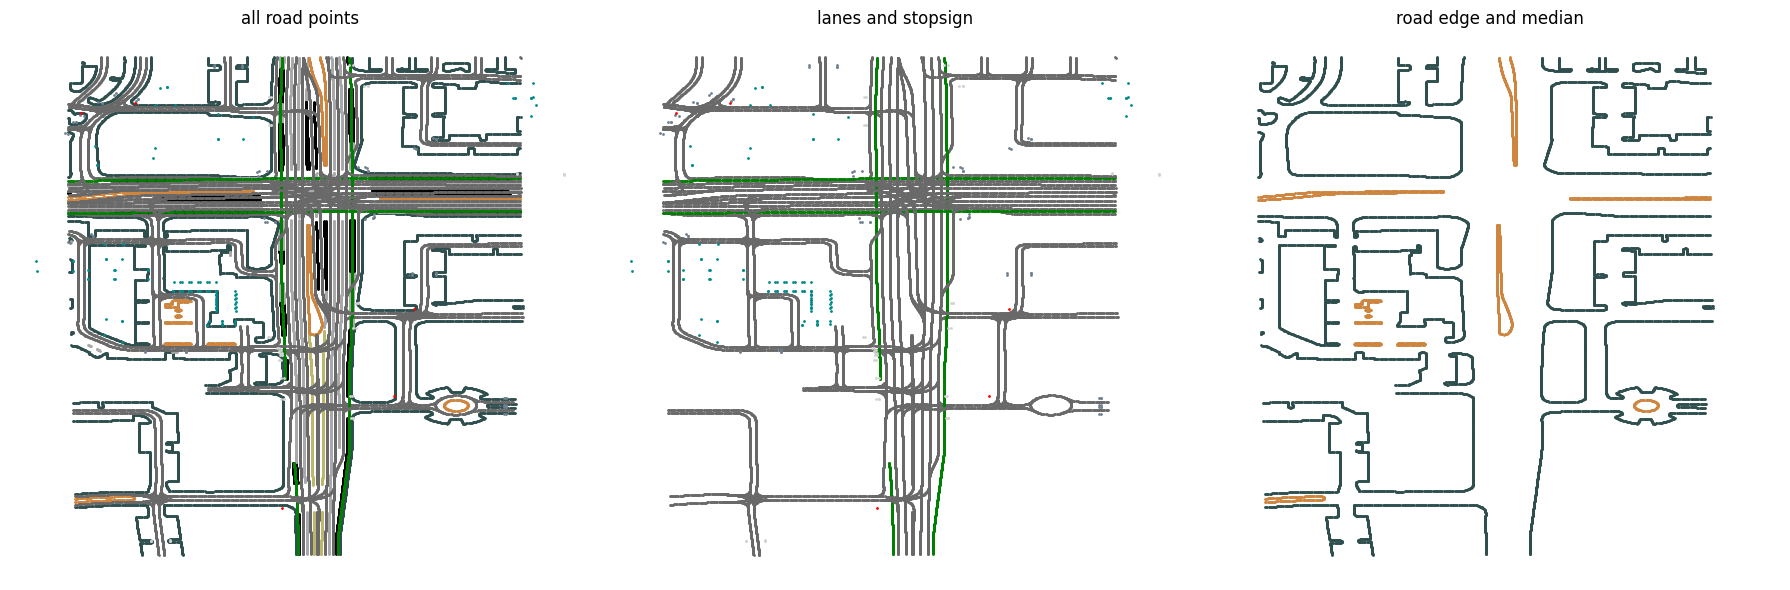

In [139]:
def plot_road_points_by_type(roads, ax, valid_types=unique_road_types):
    for i, road in enumerate(roads):
        points = np.array([(p["x"], p["y"]) for p in road["points"]])
        road_type = road["type"]
        if road_type in valid_types:
            ax.scatter(points[:, 0], points[:, 1], color=road_type_cmap[road_type], s=1)
    ax.axis("off")

valid_road_types = [
    # unique_road_types[0], # broken single white boundary
    # unique_road_types[1], # solid single white boundary
    # unique_road_types[2], # road edge boundary
    # unique_road_types[3], # road edge median
    # unique_road_types[4], # passing double yellow boundary
    # unique_road_types[5], # solid single yellow boundary
    unique_road_types[6], # surface street lane
    unique_road_types[7], # bike lane
    unique_road_types[8], # crosswalk
    unique_road_types[9], # speed bump
    unique_road_types[10], # stop sign
    unique_road_types[11], # driveway (out of house)
]
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
plot_road_points_by_type(data["roads"], ax[0])
plot_road_points_by_type(data["roads"], ax[1], valid_road_types)
plot_road_points_by_type(data["roads"], ax[2], [unique_road_types[2], unique_road_types[3],])

ax[0].set_title("all road points")
ax[1].set_title("lanes and stopsign")
ax[2].set_title("road edge and median")
plt.tight_layout()
plt.show()

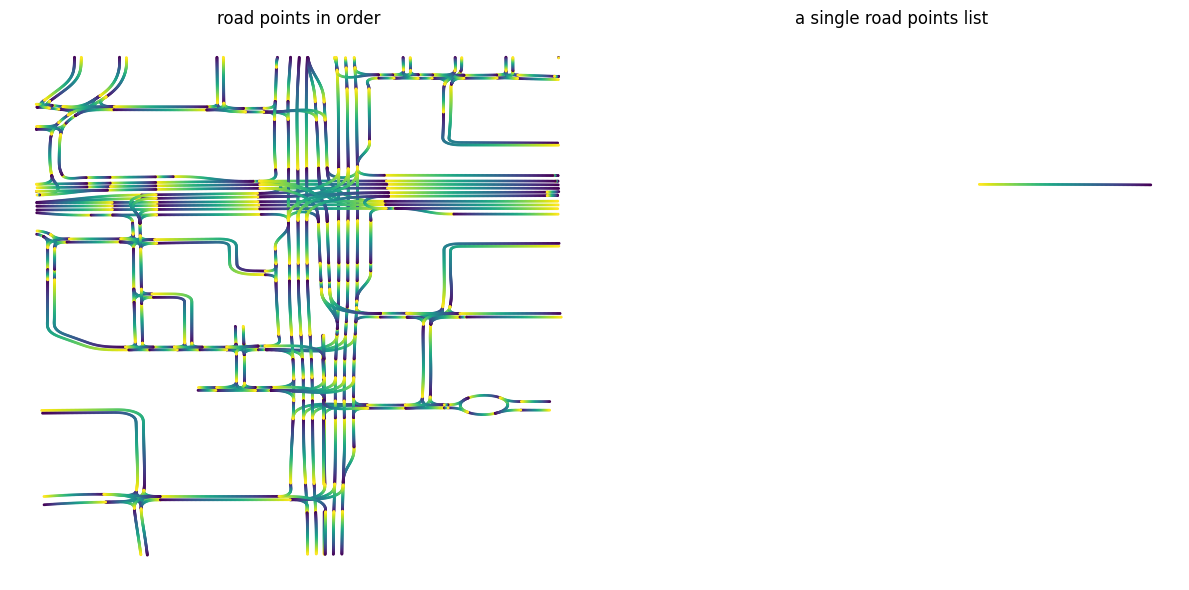

In [140]:
def plot_road_points_by_order(roads, ax, valid_types=unique_road_types, break_at=1000):
    counter = 0
    for i, road in enumerate(roads):
        points = np.array([(p["x"], p["y"]) for p in road["points"]])
        road_type = road["type"]
        if road_type in valid_types:
            c = np.arange(len(points))
            ax.scatter(points[:, 0], points[:, 1], c=c, s=1)
            counter += 1
            if counter == break_at:
                break
    ax.axis("off")

valid_road_types = [
    # unique_road_types[0], # broken single white boundary
    # unique_road_types[1], # solid single white boundary
    # unique_road_types[2], # road edge boundary
    # unique_road_types[3], # road edge median
    # unique_road_types[4], # passing double yellow boundary
    # unique_road_types[5], # solid single yellow boundary
    unique_road_types[6], # surface street lane
    # unique_road_types[7], # bike lane
    # unique_road_types[8], # crosswalk
    # unique_road_types[9], # speed bump
    # unique_road_types[10], # stop sign
    # unique_road_types[11], # driveway (out of house)
]

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
plot_road_points_by_order(data["roads"], ax[0], valid_road_types)
plot_road_points_by_order(data["roads"], ax[1], valid_road_types, break_at=1)
ax[0].set_title("road points in order")
ax[1].set_title("a single road points list")
plt.tight_layout()
plt.show()

ego_id 54
(55, 91, 2) (55, 91)


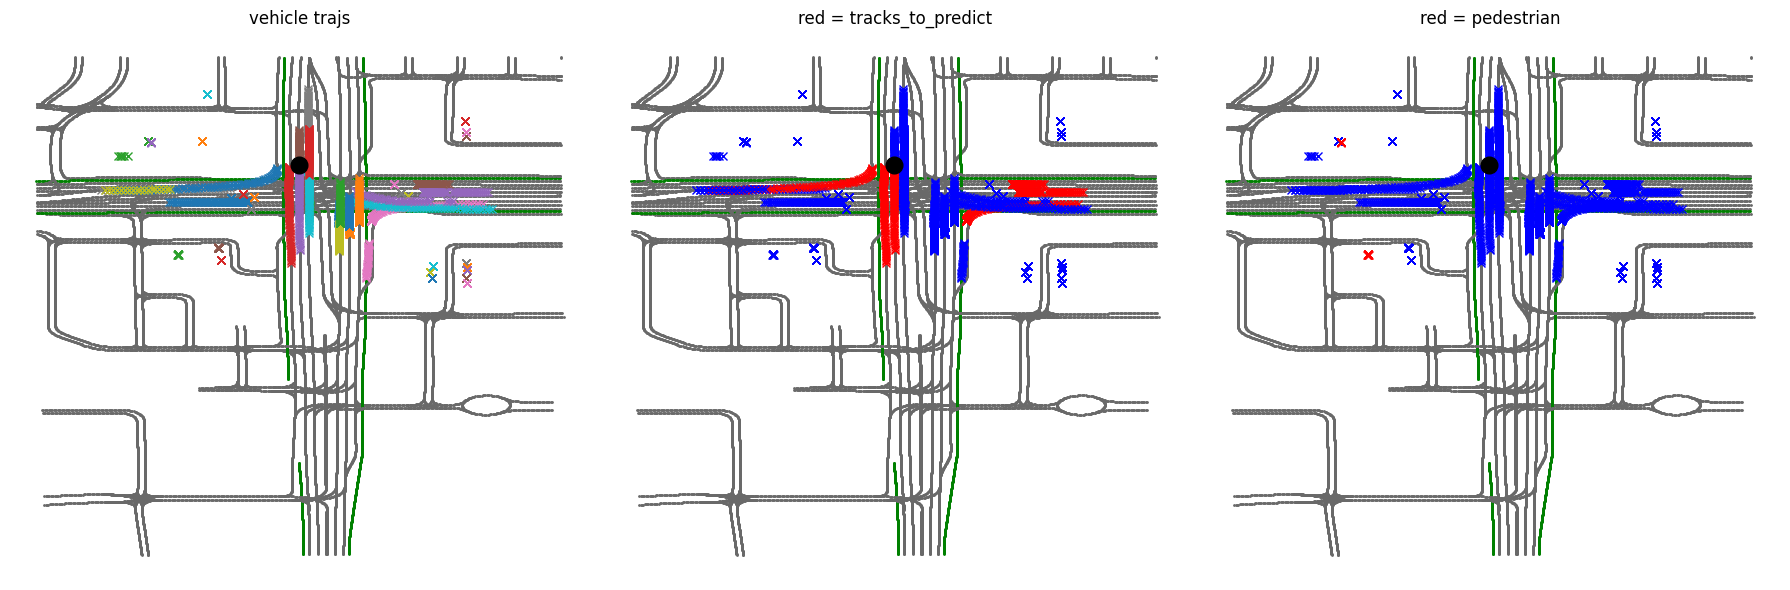

In [143]:
# plot vehicle traj
def concat_dict_values(d):
    return np.array([list(row.values()) for row in d])

ego_track_idx = data["sdc_track_index"]
tracks_to_predict = data["tracks_to_predict"] + [ego_track_idx]
track_ids = [o["id"] for o in data["objects"]]
obj_types = [o["type"] for o in data["objects"]]
pos = np.stack([concat_dict_values(o["position"]) for o in data["objects"]])
heading = np.stack([o["heading"] for o in data["objects"]])
mask = np.stack([o["valid"] for o in data["objects"]])

# ego initial position
ego_init_pos = pos[ego_track_idx][:1]

# mask positions
nan_mask = np.ones_like(mask).astype(float)
nan_mask[mask == False] *= np.nan
pos_masked = pos * nan_mask[..., None]
heading_masked = heading * nan_mask

print("ego_id", ego_track_idx)
print(pos_masked.shape, mask.shape)

valid_road_types = [
    # unique_road_types[0], # broken single white boundary
    # unique_road_types[1], # solid single white boundary
    # unique_road_types[2], # road edge boundary
    # unique_road_types[3], # road edge median
    # unique_road_types[4], # passing double yellow boundary
    # unique_road_types[5], # solid single yellow boundary
    unique_road_types[6], # surface street lane
    unique_road_types[7], # bike lane
    # unique_road_types[8], # crosswalk
    # unique_road_types[9], # speed bump
    # unique_road_types[10], # stop sign
    # unique_road_types[11], # driveway (out of house)
]

def plot_trajectories(pos, ax):
    ax.plot(pos[..., 0].T, pos[..., 1].T, "x")

def plot_tracks_to_predict(pos, tracks_to_predict, ax):
    for i in range(len(pos)):
        c = "red" if i in tracks_to_predict else "blue"
        ax.plot(pos[i, ..., 0], pos[i, ..., 1], color=c, marker="x")

def plot_tracks_by_obj_type(pos, obj_types, ax):
    cmap = {
        "vehicle": "blue",
        "pedestrian": "red",
    }
    for i in range(len(pos)):
        ax.plot(pos[i, ..., 0], pos[i, ..., 1], color=cmap[obj_types[i]], marker="x")

fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
plot_road_points_by_type(data["roads"], ax[0], valid_road_types)
plot_trajectories(pos_masked, ax[0])
ax[0].plot(ego_init_pos[..., 0], ego_init_pos[..., 1], "ko", markersize=12)

plot_road_points_by_type(data["roads"], ax[1], valid_road_types)
plot_tracks_to_predict(pos_masked, tracks_to_predict, ax[1])
ax[1].plot(ego_init_pos[..., 0], ego_init_pos[..., 1], "ko", markersize=12)

plot_road_points_by_type(data["roads"], ax[2], valid_road_types)
plot_tracks_by_obj_type(pos_masked, obj_types, ax[2])
ax[2].plot(ego_init_pos[..., 0], ego_init_pos[..., 1], "ko", markersize=12)

ax[0].set_title("vehicle trajs")
ax[1].set_title("red = tracks_to_predict")
ax[2].set_title("red = pedestrian")
plt.tight_layout()
plt.show()

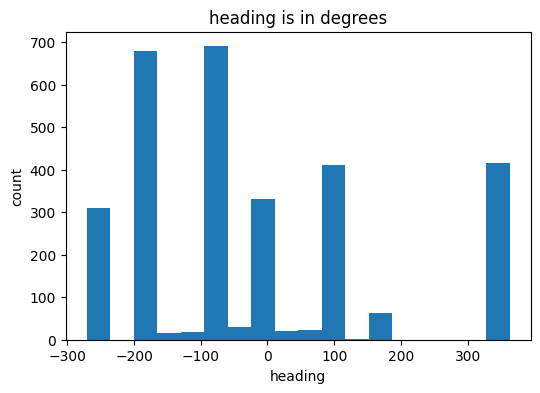

In [147]:
# plot heading distribution
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(heading_masked.flatten(), bins="auto")
ax.set_xlabel("heading")
ax.set_ylabel("count")
ax.set_title("heading is in degrees")
plt.show()

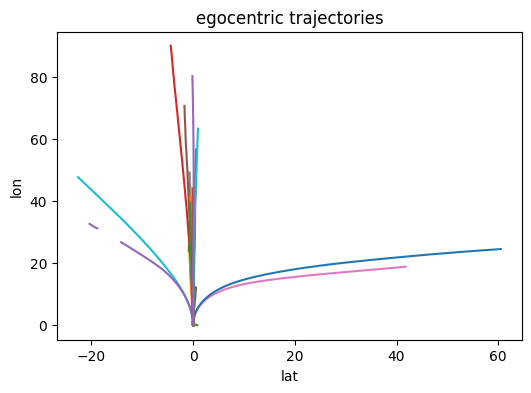

In [184]:
# transform trajs to ego centric
def get_rotation_matrix(theta):
    rot_mat = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    return rot_mat

def apply_rotation(x, theta):
    rot_mat = get_rotation_matrix(theta)
    x_rot = np.dot(rot_mat, x.T).T
    return x_rot

def transform_trajs(trajs, headings, mask):
    # get initial valid position
    trajs_0 = np.stack([t[m == True][:1] for t, m in zip(trajs, mask)])
    headings_0 = np.stack([r[m == True][0] for r, m in zip(headings, mask)])
   
    # offset trajs by initial position
    _trajs = trajs - trajs_0
    
    # rotate around initial heading
    rads = np.deg2rad(-headings_0 + 90)
    trajs_rot = np.stack([apply_rotation(t, r) for t, r in zip(_trajs, rads)])
    return trajs_rot

pos_rot = transform_trajs(pos, heading, mask)
pos_rot_masked = pos_rot * nan_mask[..., None]

# # plot rotated trajs
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(pos_rot_masked[..., 0].T, pos_rot_masked[..., 1].T)
ax.set_xlabel("lat")
ax.set_ylabel("lon")
ax.set_title("egocentric trajectories")
plt.show()